# Problem Statement:

#### Using FIMA Dataset to predict if person has diabetes or not using Random Forest Method

## Part-1 Data Processing

##### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Vyas\1_Assignment\ML FT Projects\Random Forest Classification\P12_Diabetes_Analysis\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Statistical values of the Dataset

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Getting information from the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### Finding the Null Values

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Making the Correlation Heatmap

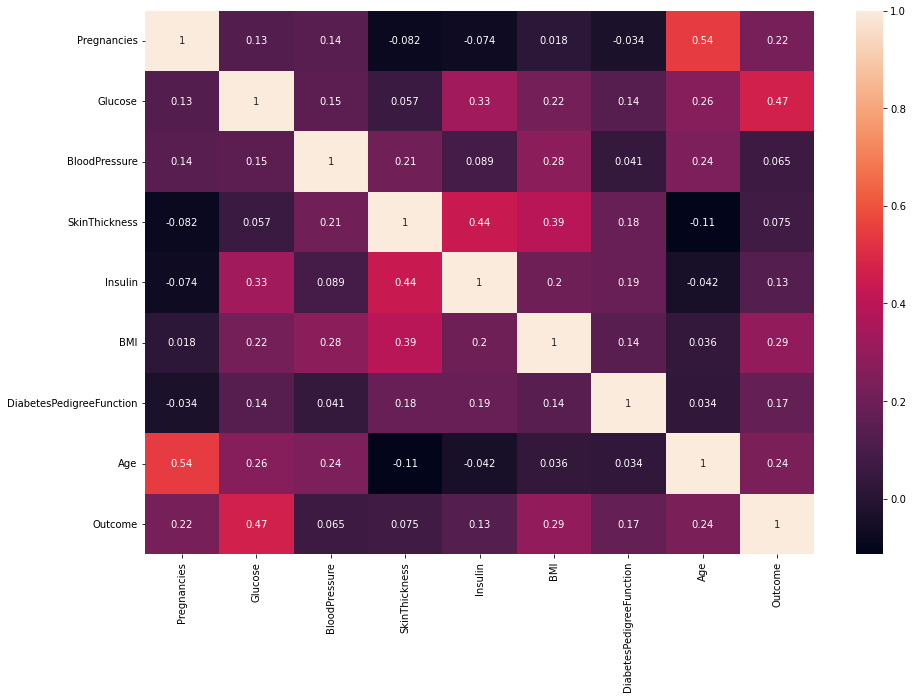

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

##### Finding number of positive and negative outcomes

In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Part-2 Model Evaluation and Pre Processing

##### Making Feature and Target Data

In [8]:
X = df.drop("Outcome", axis=1)
y = df[['Outcome']]

##### Splitting Data into Training and Testing Dataset

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=10)

##### Finding values that are 0

In [37]:
df.value_counts(df['Pregnancies']==0)

Pregnancies
False    657
True     111
dtype: int64

Entries that have values as 0 can negatively affect the model. To replace those values we are using impute.

In [38]:
from sklearn.impute import SimpleImputer

We are filling the values with mean of the column.

In [39]:
fill_values = SimpleImputer(missing_values=0, strategy="mean")

In [40]:
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

##### Fitting the model

In [41]:
model = RandomForestClassifier()

In [42]:
model.fit(X_train,y_train)

C:\Users\Vyas\AppData\Local\Temp\ipykernel_8560\2721349307.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier()

In [43]:
y_pred = model.predict(X_test)

##### Checking Confusion Metrics

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [45]:
print("Accuracy of the model: ",accuracy_score(y_test,y_pred))

Accuracy of the model:  0.7662337662337663


In [46]:
confusion_matrix(y_test,y_pred)

array([[177,  24],
       [ 48,  59]], dtype=int64)